# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = '/data/udacity/traffic-signs-data/train.p'
testing_file = '/data/udacity/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']

print('Reading data done!')

Reading data done!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = x_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.append(y_train,y_test)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

28


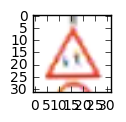

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(x_train))
image = x_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])



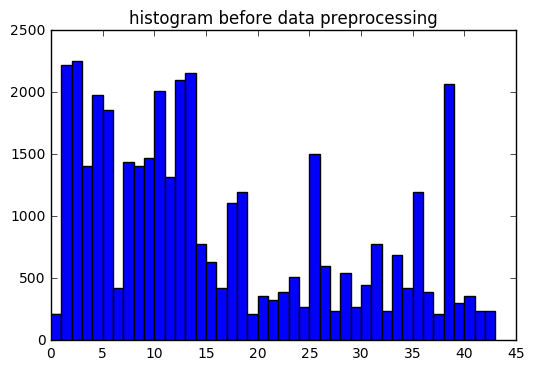

In [4]:
# Visulization of the histogram
images_per_class, bins, _ = plt.hist(y_train,bins=range(n_classes+1))
plt.title('histogram before data preprocessing')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# 1. rgb to grayscale
x_train = np.sum(x_train/3, axis=3, keepdims=True)
x_test = np.sum(x_test/3, axis=3, keepdims=True)
print('Converted rgb to graysclae')

# 2. normalize the training and testing data
x_train = np.array([(img - [128.])/128. for img in x_train])
x_test  = np.array([(img - [128.])/128. for img in x_test])
print('normalized the data')


Converted rgb to graysclae
normalized the data


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

(1) **Converting RGB to grayscale**

After testing both RGB and grayscale versions with LeNet, I found that the accuracy for testing data is about the same: *87% (RGB) and 88% (Grayscale)*. But, by using the grayscale image the number of parameters in the model are significantly reduced. One possible advantage of using grayscale image is that it may be more robust than rgb images regarding to light/color changes.

(2) **Normalize the images**

The grayscale image is [0 255], and after normalization it becomes [-1 1].

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

Visulization of one image: before and after similarity transform


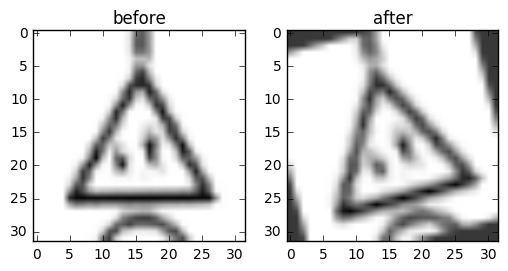

In [7]:
# 2. generate more images with a random similarity transform (2x3 matrix)
import random
import math
import cv2

def applyRandSimilarityTran(image, n):
    """ 
        apply random similarity transformation to the image, and return
        n transformed images
    """
    output_images = np.zeros((n,32,32))
    for i in range(n):
        angle = random.uniform(-15, 15) # rotation

        s = random.uniform(0.7, 1.3)    # scale

        rows,cols = image.shape[0:2]
        image_center = (rows/2.0, cols/2.0)
        rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1)
        M_rot = np.vstack([rot_mat,[0,0,1]])

        tx = random.uniform(-2, 2)      # translation along x axis
        ty = random.uniform(-2, 2)      # translation along y axis
        M_tran = np.float32([[1,0,tx],[0,1,ty],[0,0,1]])

        M = np.matrix(M_tran) * np.matrix(M_rot)

        M = np.float32(M[:2][:]) # similarity transform

        tmp = cv2.warpAffine(image, M, (cols, rows))    
        output_images[i][:][:] = tmp
        
    return output_images



# visulize the similarity transformation for one image
image = x_train[index].squeeze()
plt.figure
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('before')

new_image = applyRandSimilarityTran(image, 1)
plt.subplot(1,2,2)
plt.imshow(new_image[0][:][:], cmap='gray')
plt.title('after')

print('Visulization of one image: before and after similarity transform')


In [8]:
# Generate additional data
print('Generating 5 times more additional data...')    

n = 5
x_added = np.vstack([applyRandSimilarityTran(im,n) for im in x_train])
y_added = np.repeat(y_train, n)

# append the generated data to the training data
x_train = np.append(x_train, x_added[..., np.newaxis], axis=0)
y_train = np.append(y_train, y_added, axis = 0)

print('Generated data are added into training data!') 

Generating 5 times more additional data...
Generated data are added into training data!


In [9]:
### Generate the validation set from the training set
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Number of validation examples.
n_validation = len(y_validation)
# Number of training examples
n_train = len(y_train)
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", len(y_test))

Number of training examples = 188203
Number of validation examples = 47051
Number of testing examples = 12630


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I generate 5 times more extra training data from the original training data.
I apply the 5 random similarity transforms to each of training images and return 5 extra generated training images. In order to generate the similarity transform, I apply random *rotation angle* from (-15, 15) degress, random *scale* from [0.9, 1.1], and *random translations* tx and ty from [-2,2]. Therefore, the generated images are only a little bit different from the original training images, so that we could make sure the generated data are meaningful data for the network to learn.

Why to generate extra images for every class?
I found that sometime people would generate extra images only for the minority classes, which has significant less samples than other classes. But for this use case, I found that generate extra dataset for each image outperforms than only generate extra data for the minority classes. One possible explanation is that in real life, there are some traffic signs are much more frequent than others, e.g. “you might see much more *speed limit signs* than *roundabout sign* in the highway.”


Why to generate the data?
In my experiments, I found that this step is crucial! I try the LeNet (for grayscale image) with the original dataset, and the accuracy for the testing data is 87%. However, once I upscale the training data by generating 5 times more dataset, and I found that, without any modification of the network, the accuracy immediately becomes 93.7% for the testing dataset.





In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="conv1_W")
    conv1_b = tf.Variable(tf.zeros(6),name="conv1_b")
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma),name="conv2_W")
    conv2_b = tf.Variable(tf.zeros(16),name="conv2_b")
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name="fc1_W")
    fc1_b = tf.Variable(tf.zeros(120),name="fc1_b")
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma),name="fc2_W")
    fc2_b  = tf.Variable(tf.zeros(84),name="fc2_b")
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    
    # dropout
    hidden_layer = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma),name="fc3_W")
    fc3_b  = tf.Variable(tf.zeros(n_classes),name="fc3_b")
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


**In LeNet(x) function: I use the architecture like the figure in below, and apply dropout for before the last layer**

![LeNet Architecture](lenet.png)




In [11]:
def ConvNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Flatten. Input = 14x14x6. Output = 1176.
    layer1flat = flatten(layer1)
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    
    # Concat layer1flat and x. Input = 1176 + 400. Output = 1576
    x = tf.concat_v2([xflat, layer1flat], 1)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 1576. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(1576, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    return logits


**In ConvNet(x) function: I use the architecture like the figure in below, and apply dropout for before the last layer.**

![ConvNet Architecture](ConvNet.png)
Source: Yan LeCun


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Please see my answers above.


In [12]:
### Train my model.
from sklearn.utils import shuffle

rate = 0.0003
EPOCHS = 10
BATCH_SIZE = 128
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)


logits = ConvNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


print('Done')

Done


In [13]:
# Training and evaluation
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(x_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.838

EPOCH 2 ...
Validation Accuracy = 0.916

EPOCH 3 ...
Validation Accuracy = 0.945

EPOCH 4 ...
Validation Accuracy = 0.957

EPOCH 5 ...
Validation Accuracy = 0.968

EPOCH 6 ...
Validation Accuracy = 0.973

EPOCH 7 ...
Validation Accuracy = 0.978

EPOCH 8 ...
Validation Accuracy = 0.981

EPOCH 9 ...
Validation Accuracy = 0.984

EPOCH 10 ...
Validation Accuracy = 0.985

Model saved


In [14]:
# Test with testing data
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    saver1 = tf.train.import_meta_graph('./lenet.meta')
    saver1.restore(sess, "./lenet")
    
    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.953


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I use Adam Optimizer to train my model, and the hyperparameters are as follows: 

rate = 0.0003

EPOCHS = 10

BATCH_SIZE = 128




### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

logs:

(1) Use the original LeNet, and evaluation accuracy is 94.5% and testing data accuracy is 87%.

(2) Modify the LeNet so that it takes the grayscale images and convert the training images from rgb to grayscale. As a result, the evaluation accuracy is 95% and testing data accuracy is 88%. So there is no drop by using less image channel, however in this way, we could reduce the parameters by 2/3.

(3) Without any other changes, just replace the LeNet with ConvNet from this  [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), but the accuracy is about the same. However, I noticed that If I use much deeper networks, the deeper network is able to learn the model much better (93% for the testing data) than shadow model (LeNet 88% for testing data). Of course, it takes much more computational power and it is much slower. But I would like to stick to the simple architecture, and see how to improve the performance.

(4) After generate 5 time extra training datas, without any other changes, the performance increase to 94% for the testing data with LeNet. So my conclusion is that for shadow network, the insufficient training dataset can be a problem to keep your performance low. Therefore, it will be beneficial to generate extra training dataset.

(5) Then I added the dropout into the model, but there are no visible changes in terms of performance.

(6) Finally, I switched into ConvNet and get 98.5% for Validation dataset and 95.3% for testing dataset. 



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

9 new test images


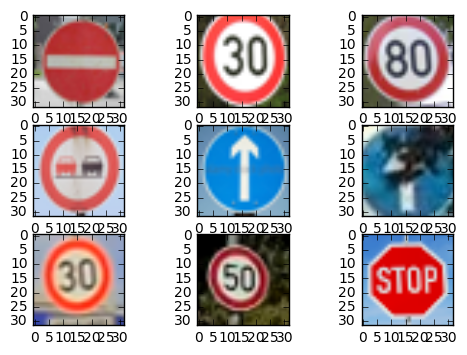

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg

plt.figure;

N = 9  # number of new testing images
x_test_new = np.zeros((N,32,32,1))

for i in range(N):
    j = i + 1
    image_name = os.path.join("images/", str(j) + ".png")
    image = mpimg.imread(image_name)
    
    x_test_new[i][:][:][:] = np.sum(np.array(image)/3., axis=2, keepdims=True)

    plt.subplot(3,3,j)
    plt.imshow(image)

print('9 new test images')


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I randomly select 9 images (as shown above) from internet and crop/resize them to be 32x32. Some of them are not complete or under shadow.

In [16]:
### Pre-process the new images

# 1. test images are already converted from rgb to grayscale
# x_test_new

# 2. add labels for the new testing images
y_test_new = np.array([17,1,5,9,35,35,1,2,14])

# 3. normalize the data
x_test_new = np.array([(img - [128.])/128. for img in x_test_new])

In [17]:
# Run the evaluation with the new testing data

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    
    test_accuracy = evaluate(x_test_new, y_test_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.222


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Even though my model perform 95.3% over the test images,  my model works poorly (22.2%) with the new collected test images. One of my guesses is that the model overfit to these German Traffic Sign Dataset, so it learns some specific features only for these German Traffic Sign dataset. Another guess is that I didn't balance the number of extra generated testing images for the minority classes. I try to use different models (LeNet and ConvNet) for learning and use different learning parameters, but no good luck with these new images.



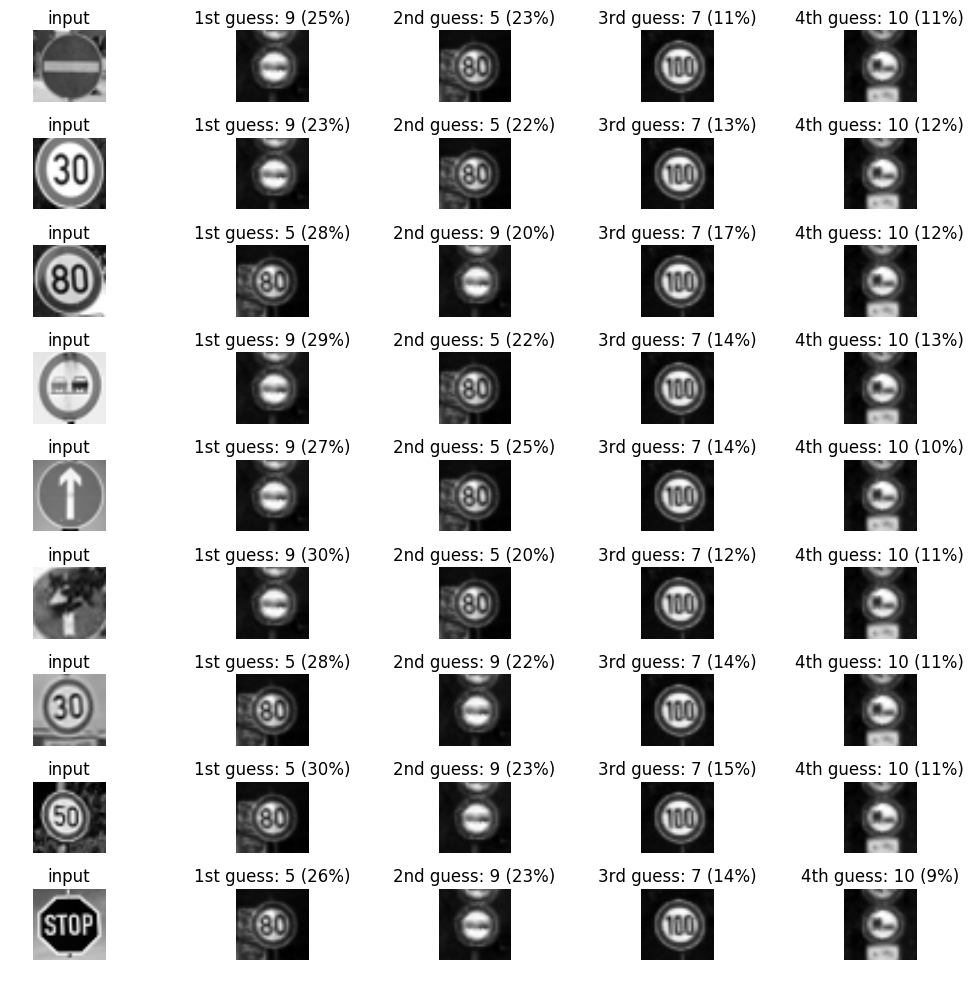

In [19]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

N = 5
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    top_k = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=4), feed_dict={x: x_test_new, keep_prob: 1.0})
    
    fig, axs = plt.subplots(len(x_test_new), n, figsize=(12, 12))
    fig.subplots_adjust(hspace = .5, wspace=.7)
    axs = axs.ravel()

    for i, image in enumerate(x_test_new):

        axs[n*i].axis('off')
        axs[n*i].imshow(image.squeeze(), cmap='gray')
        axs[n*i].set_title('input')
        
        top1 = top_k[1][i][0]
        index1 = np.argwhere(y_test == top1)[0]
        axs[n*i+1].axis('off')
        axs[n*i+1].imshow(x_test[index1].squeeze(), cmap='gray')
        axs[n*i+1].set_title('1st guess: {} ({:.0f}%)'.format(top1, 100*top_k[0][i][0]))
        
        top2 = top_k[1][i][1]
        index2 = np.argwhere(y_test == top2)[0]
        axs[n*i+2].axis('off')
        axs[n*i+2].imshow(x_test[index2].squeeze(), cmap='gray')
        axs[n*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(top2, 100*top_k[0][i][1]))
        
        top3 = top_k[1][i][2]
        index3 = np.argwhere(y_test == top3)[0]
        axs[n*i+3].axis('off')
        axs[n*i+3].imshow(x_test[index3].squeeze(), cmap='gray')
        axs[n*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(top3, 100*top_k[0][i][2]))
        
        top4 = top_k[1][i][3]
        index4 = np.argwhere(y_test == top4)[0]
        axs[n*i+4].axis('off')
        axs[n*i+4].imshow(x_test[index4].squeeze(), cmap='gray')
        axs[n*i+4].set_title('4th guess: {} ({:.0f}%)'.format(top4, 100*top_k[0][i][3]))
        

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

For the 9 testing images, the top 4 predicted classes are always the same and the network is quite uncertainty about all the results. The model learns specific features from the dataset, which doesn't generalize. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.